## **TIME SERIES ANALYSIS**


### **LIBRARIES FOR TIME SERIES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **LOAD DATA INTO A DATAFRAME**

In [2]:
df = pd.read_csv('passengers.txt')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month']) # convert to datetime
df.set_index('Month', inplace=True) # set index to month

Text(0, 0.5, 'Passengers')

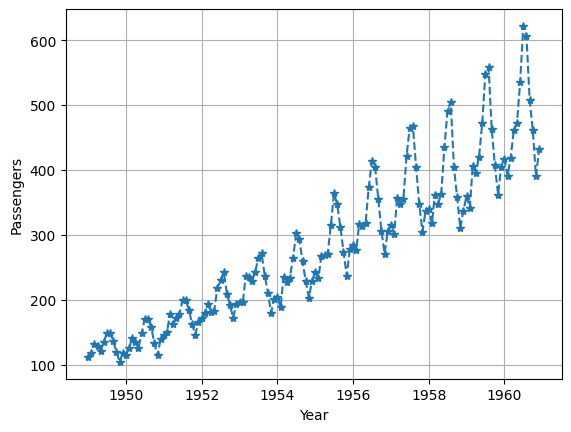

In [4]:
plt.plot(df.index, df['Passengers'], marker='*', linestyle='--');
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [5]:
df.isnull().values.any() # check for missing values

False

In [6]:
df_copy = df.copy() # makes a copy of the dataframe
row = df_copy.sample(frac=0.1, random_state=0) # randomly sample 10% of the data
row['Passengers'] = np.nan # set 'Passengers' to NaN

In [11]:
df_copy.loc[row.index, 'Passengers'] = row['Passengers'] # replace the values in the original dataframe with NaN
df_copy.isnull().sum() # check for missing values

Passengers    14
dtype: int64

### **FILLING MISSING VALUES**

In [12]:
df_copy_ffill = df_copy.fillna(method='ffill') # forward fill
df_copy_ffill.isnull().sum()

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6672\2548779162.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_ffill = df_copy.fillna(method='ffill') # forward fill


Passengers    0
dtype: int64

In [13]:
df_copy_bfill = df_copy.fillna(method='bfill') # backward fill
df_copy_bfill.isnull().sum()

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6672\3037775556.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_bfill = df_copy.fillna(method='bfill') # backward fill


Passengers    0
dtype: int64

In [14]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward') # linear interpolation forward
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [15]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward') # linear interpolation backward
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

### **DOWNSAMPLING AND UPSAMPLING**

In [16]:
df_quarterly = df_copy.resample('3M').mean() # resample to quarterly data

C:\Users\Aduragbemi\AppData\Local\Temp\ipykernel_6672\1453004511.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_quarterly = df_copy.resample('3M').mean() # resample to quarterly data


In [18]:
df_daily = df_copy.resample('D').mean() # resample to daily data

Text(0.5, 1.0, 'Upsampling')

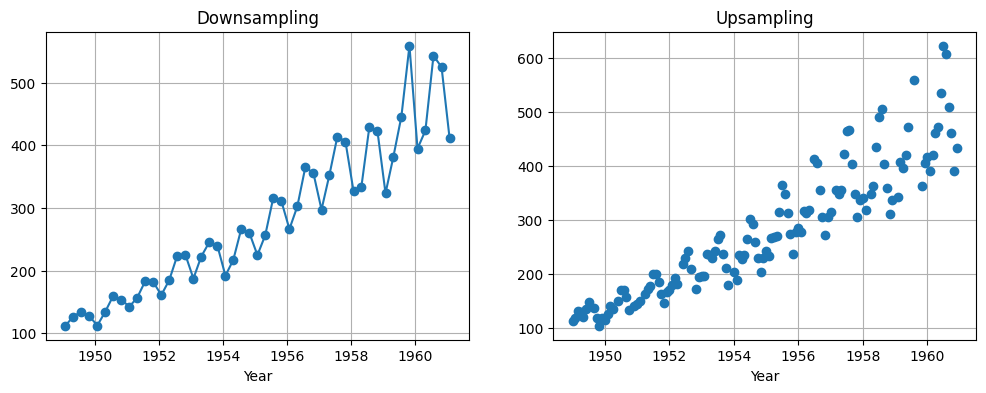

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(df_quarterly.index, df_quarterly['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Downsampling')

plt.subplot(1, 2, 2)
plt.plot(df_daily.index, df_daily['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Upsampling')

### **SMOOTHING**

In [33]:
df_MA = df_copy.copy()
MA = df_MA['Passengers'].rolling(12).mean() # 12-month moving average

In [47]:
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01           NaN
1960-09-01           NaN
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

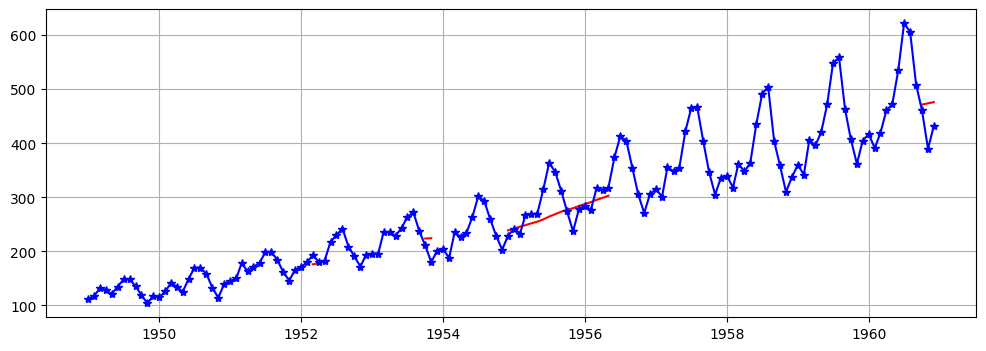

In [44]:
plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(MA.index, MA.values, linestyle='-', color='red')
plt.plot(df.index, df['Passengers'], marker='*', linestyle='-', color='blue')